# Data Science QUESTION 2

  
You'll be asked to do some analysis and modeling tasks on a dataset created.  
The dataset concerns a video gaming company that has information on its customers and would like to gain more insights on what drives their customers to play for longer hours.  

The following tables are provided:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_districts_house_prices = pd.read_csv("df_districts_house_prices.csv")
df_person_data = pd.read_csv("df_person_data.csv")
df_person_district = pd.read_csv("df_person_district.csv")

df_person_district

includes information about each customer (person) and the district they live in

- person_id: the person id
- district: the name of the district

In [3]:
df_person_district

,person_id,district
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone
1,16f3bafb-9556-434e-adab-cb02f41fe32a,Tashnerspool
2,0fa17eee-7214-4609-97fe-dd3093601800,Tashnerspool
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,Ulven
4,51fed64a-375e-417f-94e4-4d27c368ea44,Red Onvey
...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,Bluffssel
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,Highnantmar
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,Tashnerspool
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,Highnantmar


df_districts_house_prices

includes information about each district and the prices of the houses in the district

- district: the name of the district
- house_price: the price of the house
- house_number: the house number in the district

In [4]:
df_districts_house_prices

,district,house_price,house_number
0,Celowsgan,160652.0,1
1,Celowsgan,159219.0,2
2,Celowsgan,161543.0,3
3,Celowsgan,158944.0,4
4,Celowsgan,164121.0,5
...,...,...,...
1358,El Willong,932441.0,30
1359,El Willong,890190.0,31
1360,El Willong,892096.0,32
1361,El Willong,935117.0,33


df_person_data

includes personal information about each of the customers and relevant information to their video gaming habits

- person_id: identifier for a person
- age: the age of the person
- n_kids: the number of kids this person has
- n_vg: the number of video games the person owns
- n_con: the number of video game consols the person owns
- n_presub: the number of premium subscription the person owns
- n_hours_playing: the total number of hours this person play per month 

In [5]:
df_person_data

,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745
1,16f3bafb-9556-434e-adab-cb02f41fe32a,18.0,0,2,0,0,20.693273
2,0fa17eee-7214-4609-97fe-dd3093601800,28.0,0,3,0,0,22.412490
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,20.0,1,72,0,0,299.187025
4,51fed64a-375e-417f-94e4-4d27c368ea44,32.0,1,58,1,3,20.367141
...,...,...,...,...,...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,32.0,4,62,1,2,21.378288
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,36.0,0,53,1,1,3.707476
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,19.0,0,1,1,0,23.809075
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,31.0,2,49,3,2,15.708397


## Quick EDA

The goals of these questions is to evaluate your plotting, data mangling, and plot interpretation skills.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   

### 1. Plot each district's house prices distribution with marking the mean by a vertical line


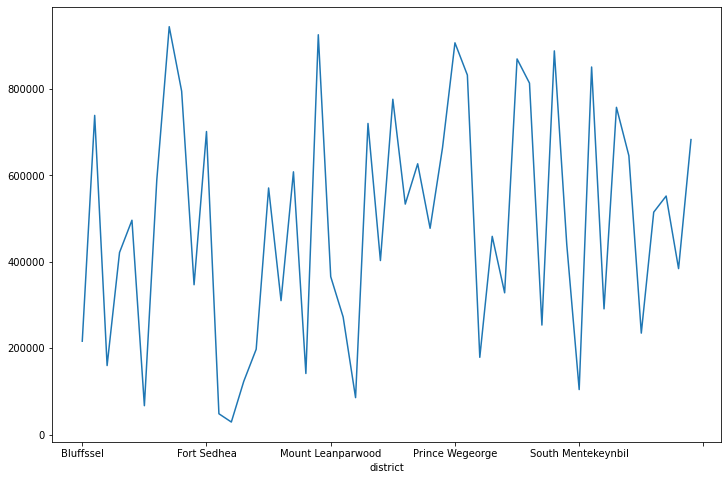

In [6]:
plt.figure(figsize=(12,8))
df_districts_house_prices.groupby(["district"]).house_price.mean().plot()
plt.show()

### 2. Combine all of the three data sources into one table to use in further analysis. 

In [7]:
combine_df = pd.concat([df_districts_house_prices, df_person_data, df_person_district], axis=1)

In [8]:
combine_df.head()

,district,house_price,house_number,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing,person_id,district
0,Celowsgan,160652.0,1.0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone
1,Celowsgan,159219.0,2.0,16f3bafb-9556-434e-adab-cb02f41fe32a,18.0,0,2,0,0,20.693273,16f3bafb-9556-434e-adab-cb02f41fe32a,Tashnerspool
2,Celowsgan,161543.0,3.0,0fa17eee-7214-4609-97fe-dd3093601800,28.0,0,3,0,0,22.412490,0fa17eee-7214-4609-97fe-dd3093601800,Tashnerspool
3,Celowsgan,158944.0,4.0,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,20.0,1,72,0,0,299.187025,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,Ulven
4,Celowsgan,164121.0,5.0,51fed64a-375e-417f-94e4-4d27c368ea44,32.0,1,58,1,3,20.367141,51fed64a-375e-417f-94e4-4d27c368ea44,Red Onvey


### 3. Plot age vs avg house price. What does this plot tell you? (younger people live in more expensive districts)

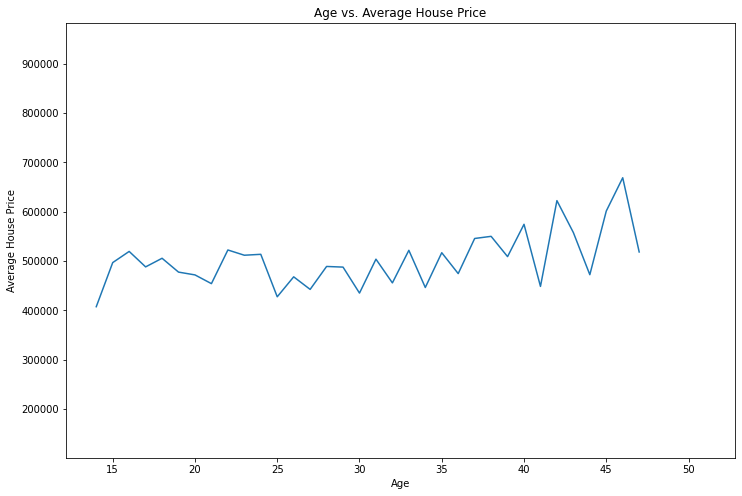

In [9]:
plt.figure(figsize=(12,8))
avg_house_price = combine_df.groupby('age')['house_price'].mean()

plt.plot(avg_house_price.index, avg_house_price.values)
plt.xlabel('Age')
plt.ylabel('Average House Price')
plt.title('Age vs. Average House Price')

plt.show()

## Probability and Statistics:

The goal of these questions is to test your ability to answer probability and stat questions with code.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   


### 1. What's the probability of a customer having 2 kids

In [10]:
customers_with_2_kids = combine_df[combine_df['n_kids'] == 2]
probability_2_kids = len(customers_with_2_kids) / len(combine_df)

print("Probability of a customer having 2 kids:", probability_2_kids)

Probability of a customer having 2 kids: 0.10017142857142858


### 2. What's the probability of a customer owning more than 10 video games given that they have less than 2 kids

In [11]:
customers_less_than_2_kids = combine_df[combine_df['n_kids'] < 2]

customers_more_than_10_vg = customers_less_than_2_kids[customers_less_than_2_kids['n_vg'] > 10]

probability_more_than_10_vg_given_less_than_2_kids = len(customers_more_than_10_vg) / len(customers_less_than_2_kids)

print("Probability of owning more than 10 video games given less than 2 kids:", probability_more_than_10_vg_given_less_than_2_kids)

Probability of owning more than 10 video games given less than 2 kids: 0.4018363273453094


### 3. Plot the distribution of the number of hours played by customers `n_hours_playing`. Briefly explain what you understand now about the customers' playing hours.

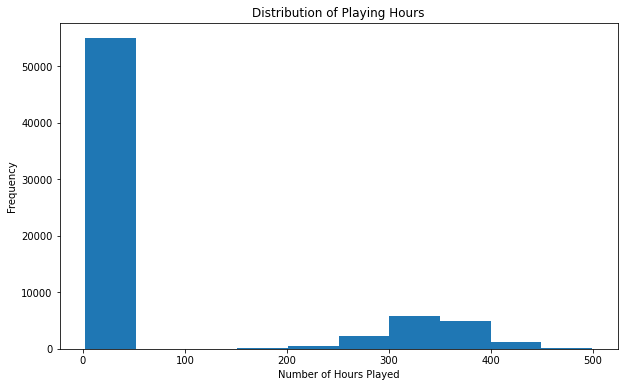

In [12]:
plt.figure(figsize=(10,6))

plt.hist(combine_df['n_hours_playing'], bins=10)
plt.xlabel('Number of Hours Played')
plt.ylabel('Frequency')
plt.title('Distribution of Playing Hours')
plt.show()

As you can see, most customers have a number of hours less than 50 so let's go ahead and remove any values less than 50.  
The distribution of the remaining values look like a normal distribution.  
###  4. Estimate the parameters (mean and std deviation) of this normal distribution computationally.  \
### (Bonus: plot the estimated normal distribution on top of the distribution of `n_hours_playing` after removing values < 50)

In [13]:
mean_hours = combine_df['n_hours_playing'].mean()
std_hours = combine_df['n_hours_playing'].std()

print("Estimated Mean:", mean_hours)
print("Estimated Standard Deviation:", std_hours)

Estimated Mean: 86.58507315764899
Estimated Standard Deviation: 133.66556897706607


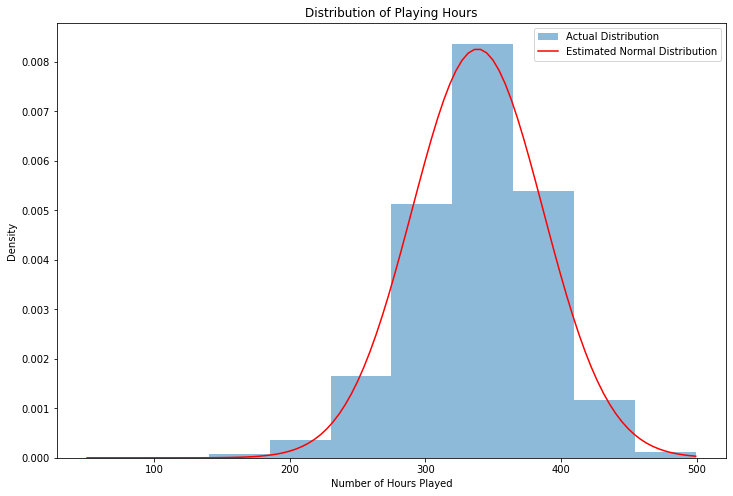

In [14]:
filtered_hours = combine_df[combine_df['n_hours_playing'] >= 50]['n_hours_playing']

mean_hours = filtered_hours.mean()
std_hours = filtered_hours.std()

x = np.linspace(filtered_hours.min(), filtered_hours.max(), 100)
y = (1 / (std_hours * np.sqrt(2 * np.pi))) * np.exp(-(x - mean_hours)**2 / (2 * std_hours**2))

plt.figure(figsize=(12,8))
plt.hist(filtered_hours, bins=10, density=True, alpha=0.5, label='Actual Distribution')
plt.plot(x, y, color='red', label='Estimated Normal Distribution')
plt.xlabel('Number of Hours Played')
plt.ylabel('Density')
plt.title('Distribution of Playing Hours')
plt.legend()
plt.show()

# Modeling
The goal of this is to showcase your experimentation and model comparison process.  
The performance of models is not as important as how you compare them and evaluate them against each other.  

Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   
# Apply Different regression model 
# Apply two classffier Model for the data of classfication ( as per your choice)

### 1. Model the number of hours played for each customer. Show your experimentation with failed and successful models.
### 2. Evaluate each experiment using appropriate metrics, cross validation, and plots. Show the predicted vs actual plot.
### 3. Choose the best model for the data

In [15]:
combine_df.head()

,district,house_price,house_number,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing,person_id,district
0,Celowsgan,160652.0,1.0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone
1,Celowsgan,159219.0,2.0,16f3bafb-9556-434e-adab-cb02f41fe32a,18.0,0,2,0,0,20.693273,16f3bafb-9556-434e-adab-cb02f41fe32a,Tashnerspool
2,Celowsgan,161543.0,3.0,0fa17eee-7214-4609-97fe-dd3093601800,28.0,0,3,0,0,22.412490,0fa17eee-7214-4609-97fe-dd3093601800,Tashnerspool
3,Celowsgan,158944.0,4.0,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,20.0,1,72,0,0,299.187025,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,Ulven
4,Celowsgan,164121.0,5.0,51fed64a-375e-417f-94e4-4d27c368ea44,32.0,1,58,1,3,20.367141,51fed64a-375e-417f-94e4-4d27c368ea44,Red Onvey


In [16]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   district         1363 non-null   object 
 1   house_price      1352 non-null   float64
 2   house_number     1363 non-null   float64
 3   person_id        70000 non-null  object 
 4   age              69990 non-null  float64
 5   n_kids           70000 non-null  int64  
 6   n_vg             70000 non-null  int64  
 7   n_con            70000 non-null  int64  
 8   n_presub         70000 non-null  int64  
 9   n_hours_playing  70000 non-null  float64
 10  person_id        70000 non-null  object 
 11  district         70000 non-null  object 
dtypes: float64(4), int64(4), object(4)
memory usage: 6.9+ MB


In [17]:
combine_df.isnull().sum()

district           68637
house_price        68648
house_number       68637
person_id              0
age                   10
n_kids                 0
n_vg                   0
n_con                  0
n_presub               0
n_hours_playing        0
person_id              0
district               0
dtype: int64

In [18]:
combine_df.drop(["person_id", "district", "house_price", "house_number"], axis=1, inplace=True)

In [19]:
combine_df.isnull().sum()

age                10
n_kids              0
n_vg                0
n_con               0
n_presub            0
n_hours_playing     0
dtype: int64

In [20]:
combine_df["age"] = combine_df["age"].fillna(combine_df["age"].mode()[0])

In [21]:
combine_df["age"].isnull().sum()

0

In [22]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              70000 non-null  float64
 1   n_kids           70000 non-null  int64  
 2   n_vg             70000 non-null  int64  
 3   n_con            70000 non-null  int64  
 4   n_presub         70000 non-null  int64  
 5   n_hours_playing  70000 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 3.7 MB


In [23]:
X = combine_df.drop(columns=['n_hours_playing'], axis=1)
y = combine_df['n_hours_playing']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Linear Regression:

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    
    # Print accuracy
    accuracy = model.score(x_test, y_test) * 100
    print("Accuracy:", accuracy)
    
    # Perform cross-validation and obtain the predicted values
    y_pred_cv = cross_val_predict(model, x, y, cv=5)
    
    # Calculate the Mean Squared Error (MSE) and R-squared score
    mse = mean_squared_error(y, y_pred_cv)
    r2 = r2_score(y, y_pred_cv)
    print("Cross-Validated MSE:", mse)
    print("Cross-Validated R-squared:", r2)
    print("Mean Square Error", mse)
    print("R2 Score:", r2)

    # Create a scatter plot of predicted vs. actual values
    plt.scatter(y, y_pred_cv, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs. Actual')
    plt.show()
    

Accuracy: 81.58432973501577
Cross-Validated MSE: 3309.951580191147
Cross-Validated R-squared: 0.8147369787609401
Mean Square Error 3309.951580191147
R2 Score: 0.8147369787609401


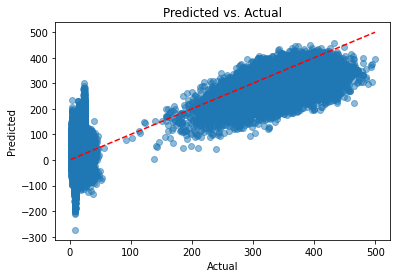

In [55]:
# Create the Linear Regression model
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
classify(linreg_model, X, y)

### Decision Tree Regressor:

In [56]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()

Accuracy: 94.73994109080012
Cross-Validated MSE: 979.5886319592365
Cross-Validated R-squared: 0.9451709352443985
Mean Square Error 979.5886319592365
R2 Score: 0.9451709352443985


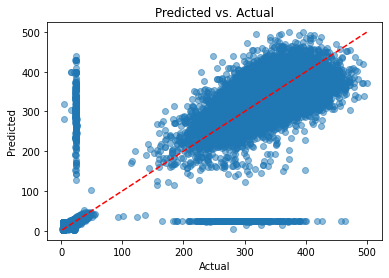

In [57]:
classify(tree_model, X, y)